# Random_Sample_Imputation

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\user\\Documents\\data sets\\titanic.csv",usecols=
                 ['Survived','Fare','Age'])
df.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [3]:
df.isnull().mean() * 100

Survived     0.000000
Age         20.574163
Fare         0.239234
dtype: float64

In [4]:
x = df.drop(columns ='Survived')
y= df['Survived']

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [6]:
x_train

,Age,Fare
123,28.0,7.2500
224,53.0,27.4458
310,18.0,8.6625
273,NaN,15.5000
317,19.0,10.5000
...,...,...
400,30.0,164.8667
118,36.0,75.2417
189,40.0,13.0000
206,35.0,7.7500


In [7]:
x_train['Age_imputed'] = x_train['Age']
x_test['Age_imputed'] = x_test['Age']

In [8]:
x_test.tail()

,Age,Fare,Age_imputed
252,27.0,136.7792,27.0
331,39.0,29.7000,39.0
285,36.0,7.2500,36.0
334,27.0,7.8958,27.0
101,27.0,26.0000,27.0


In [9]:
x_train['Age_imputed'][x_train['Age_imputed'].isnull()] = x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values
x_test['Age_imputed'][x_test['Age_imputed'].isnull()] = x_train['Age'].dropna().sample(x_test['Age'].isnull().sum()).values

In [10]:
x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values

array([ 6. , 27. , 47. , 29. , 25. , 18. , 23. , 42. , 29. , 49. , 31. ,
       22. , 21. , 32. , 24. , 42. ,  1. , 48. , 18. , 18. , 14. , 18. ,
       23. , 26. , 47. , 47. , 43. , 30. , 11.5, 39. , 35. , 26. , 37. ,
       24. , 27. , 41. , 31. ,  5. , 55. , 30. , 19. , 57. , 18. , 29. ,
       36. , 30. , 31. , 38. , 28. , 48. , 36. , 54. , 24. , 30. , 28.5,
        6. , 62. , 18.5, 50. , 32. , 45. , 22. , 21. , 21. , 31. , 16. ,
       25. , 45. , 45. , 39. , 23. , 27. , 22. , 21. , 53. ])

In [11]:
x_train['Age'].isnull().sum()

75

In [12]:
x_train

,Age,Fare,Age_imputed
123,28.0,7.2500,28.0
224,53.0,27.4458,53.0
310,18.0,8.6625,18.0
273,NaN,15.5000,30.0
317,19.0,10.5000,19.0
...,...,...,...
400,30.0,164.8667,30.0
118,36.0,75.2417,36.0
189,40.0,13.0000,40.0
206,35.0,7.7500,35.0


C:\Users\user\AppData\Local\Temp\ipykernel_5912\4060039490.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'],label='Original',hist=False)
C:\Users\user\AppData\Local\Temp\ipykernel_5912\4060039490.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age

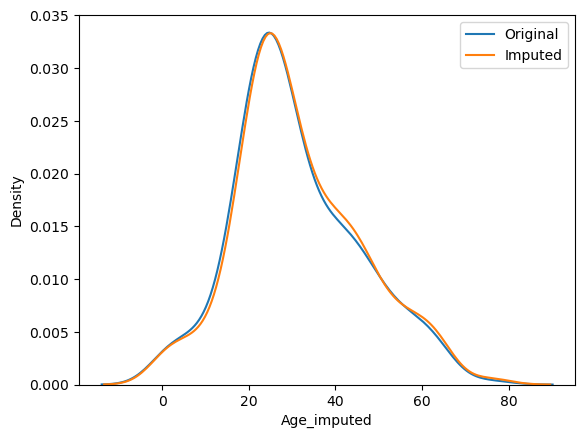

In [13]:
sns.distplot(x_train['Age'],label='Original',hist=False)
sns.distplot(x_train['Age_imputed'],label= 'Imputed',hist=False)
plt.legend()
plt.show()

In [14]:
print('Original variable variance: ', x_train['Age'].var())
print('Variance after random imputation: ', x_train['Age_imputed'].var())

Original variable variance:  206.16469905719674
Variance after random imputation:  210.88075112477748


In [15]:
x_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2435.667672,276.677913,201.207452
Age,276.677913,206.164699,206.164699
Age_imputed,201.207452,206.164699,210.880751


<Axes: >

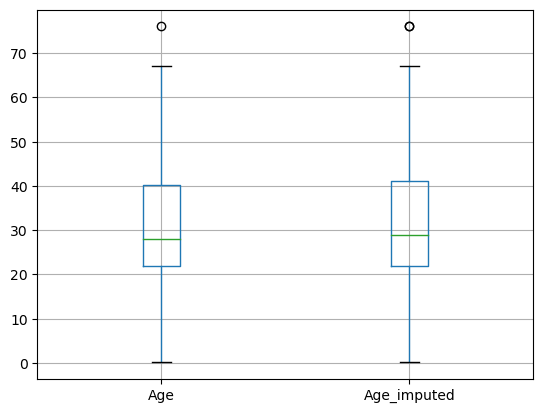

In [16]:
x_train[['Age','Age_imputed']].boxplot()

# By Missing_Indicator

In [41]:
df = pd.read_csv("C:\\Users\\user\\Documents\\data sets\\titanic.csv",usecols=
                 ['Survived','Parch','Age'])
df.head()

,Survived,Age,Parch
0,0,34.5,0
1,1,47.0,0
2,0,62.0,0
3,0,27.0,0
4,1,22.0,1


In [42]:
x = df.drop(columns =['Survived'])
y = df['Survived']

In [43]:
df.isnull().sum()

Survived     0
Age         86
Parch        0
dtype: int64

In [44]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [21]:
from sklearn.impute import MissingIndicator,SimpleImputer
si = SimpleImputer()

In [22]:
x_train_trf = si.fit_transform(x_train)
x_test_trf = si.transform(x_test)

In [23]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train_trf,y_train)
y_pred = lr.predict(x_test_trf)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6904761904761905

In [24]:
mi = MissingIndicator()

mi.fit(x_train)

MissingIndicator()

In [25]:
mi.features_

array([0], dtype=int64)

In [26]:
x_train_missing = mi.transform(x_train)
x_train_missing

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [

In [27]:
x_test_missing = mi.transform(x_test)
x_test_missing

array([[ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [

In [28]:
x_train['Age_NA'] = x_train_missing

In [29]:
x_train

,Age,Parch,Age_NA
280,23.0,0,False
284,2.0,1,False
40,39.0,1,False
17,21.0,0,False
362,31.0,0,False
...,...,...,...
299,29.0,0,False
22,NaN,0,True
72,29.0,0,False
15,24.0,0,False


In [39]:
si = SimpleImputer()

x_train_trf2 = si.fit_transform(x_train)
x_test_trf2 = si.transform(x_test)

In [40]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(x_train_trf2,y_train)

y_pred = clf.predict(x_test_trf2)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6904761904761905